In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd
import json
from sqlalchemy import create_engine
#import pymysql
import warnings
warnings.filterwarnings('ignore')

In [3]:
db_conn = mysql.connector.connect(host="localhost", user="root", passwd="1234",  database='cs670research')
db_cursor = db_conn.cursor(buffered=True)
insert_query = "SELECT * FROM research_exploration_label WHERE label IN ('aws', 'gc', 'azure')"
pandasDf_original =  pd.read_sql(insert_query, con=db_conn)
pandasDf_original['score_1']=pandasDf_original['score_1'].astype('float64')
pandasDf_original['score_2']=pandasDf_original['score_2'].astype('float64')
pandasDf_original['score_3']=pandasDf_original['score_3'].astype('float64')
pandasDf_original['type'] = 'Original'

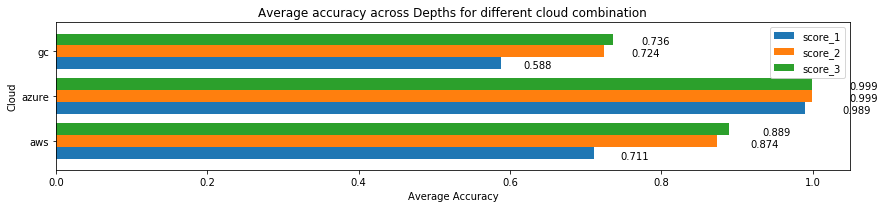

In [5]:
# Average Accuracy across Depths

pd_merged_pivot = pd.pivot_table(pandasDf_original, index=['label'], values=['score_1', 'score_2', 'score_3'], aggfunc='mean')

ax = pd_merged_pivot.plot(kind='barh', figsize=(12, 3), width=.8)
ax.legend(loc='best')
ax.set_ylabel('Cloud')
ax.set_xlabel('Average Accuracy')
ax.set_title('Average accuracy across Depths for different cloud combination')
plt.tight_layout()
for p in ax.patches:
    if round(p.get_width(), 3) == 0.0:
        continue
    ax.text(p.get_width()*1.05, p.get_y()*1.01, str(round(p.get_width(), 3)))

In [4]:
pandasDf_original

,file_name,dataset,label,status,score_1,score_2,score_3,time,actual_str,detected_str,type
0,000000000009.jpg,image_labeling,aws,0,1.000000,1.000000,1.000000,0.7530777454376221,"['different', 'tray', 'food', 'bunch']","['Plant', 'Food', 'Creme', 'Cream', 'Dessert',...",Original
1,000000000025.jpg,image_labeling,gc,0,0.833333,1.000000,1.000000,0.7355644702911377,"['trees', 'standing', 'next', 'forest', 'giraf...","['reserve', 'adaptation', 'nature', 'wildernes...",Original
2,000000000036.jpg,image_labeling,gc,0,1.000000,1.000000,1.000000,0.657092809677124,"['girl', 'umbrella', 'suit', 'pink', 'bathing']","['magenta', 'summer', 'beauty', 'colorfulness'...",Original
3,000000000049.jpg,image_labeling,aws,0,0.750000,1.000000,1.000000,0.8776524066925049,"['rider', 'costumed', 'make', 'horse', 'hind',...","['Mammal', 'Animal', 'Horse', 'Person', 'Human...",Original
4,000000000072.jpg,image_labeling,azure,0,1.000000,1.000000,1.000000,0.9527721405029297,"['hugging', 'giraffe', 'other', 'two', 'appear']","['giraffe', 'outdoor', 'animal', 'mammal', 'st...",Original
...,...,...,...,...,...,...,...,...,...,...,...
17156,000000581715.jpg,image_labeling,aws,0,0.142857,0.142857,0.285714,0.5449745655059814,"['chees', 'onions', 'red', 'large', 'meat', 't...","['Food', 'Pizza']",Original
17157,000000581732.jpg,image_labeling,gc,0,0.857143,1.000000,1.000000,0.6546590328216553,"['holding', 'bat', 'baseball', 'picture', 'red...","['night', 'room', 'red', 'font', 'black', 'dar...",Original
17158,000000581766.jpg,image_labeling,gc,0,0.666667,1.000000,1.000000,0.40654492378234863,"['bathroom', 'public', 'wall', 'urinal', 'thre...","['ceramic', 'fixture', 'bathroom', 'seat', 're...",Original
17159,000000581903.jpg,image_labeling,aws,0,0.200000,0.800000,1.000000,0.4848761558532715,"['store', 'sell', 'assortment', 'different', '...","['Appliance', 'Mixer', 'Blender', 'Beer', 'Dri...",Original


In [ ]:
 label       |
+-------------+
| aws         |
| gc          |
| gc-noisy    |
| azure       |
| aws-noisy   |
| azure-noisy |